<a href="https://colab.research.google.com/github/LSaiAnirudh/machine-learning/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# description: predict the closing stock price using past 60 day stock price.

In [1]:
# import libraries
import math
import datetime
import yfinance as yf
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2019, 12, 17)

# Fetch the stock data
df = yf.download('^NSEI', start=start, end=end)

# Show the data
df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,4675.799805,4773.100098,4675.799805,4765.299805,4765.299805,0
2012-01-04,4774.950195,4782.850098,4728.850098,4749.649902,4749.649902,0
2012-01-05,4749.000000,4779.799805,4730.149902,4749.950195,4749.950195,0
2012-01-06,4724.149902,4794.899902,4686.850098,4754.100098,4754.100098,0
2012-01-09,4747.549805,4758.700195,4695.450195,4742.799805,4742.799805,0
...,...,...,...,...,...,...
2019-12-10,11950.500000,11953.200195,11844.700195,11856.799805,11856.799805,650200
2019-12-11,11867.349609,11923.200195,11832.299805,11910.150391,11910.150391,997700
2019-12-12,11944.299805,12005.500000,11934.000000,11971.799805,11971.799805,752600


In [3]:
#get the no of rows and columns
df.shape

(1941, 6)

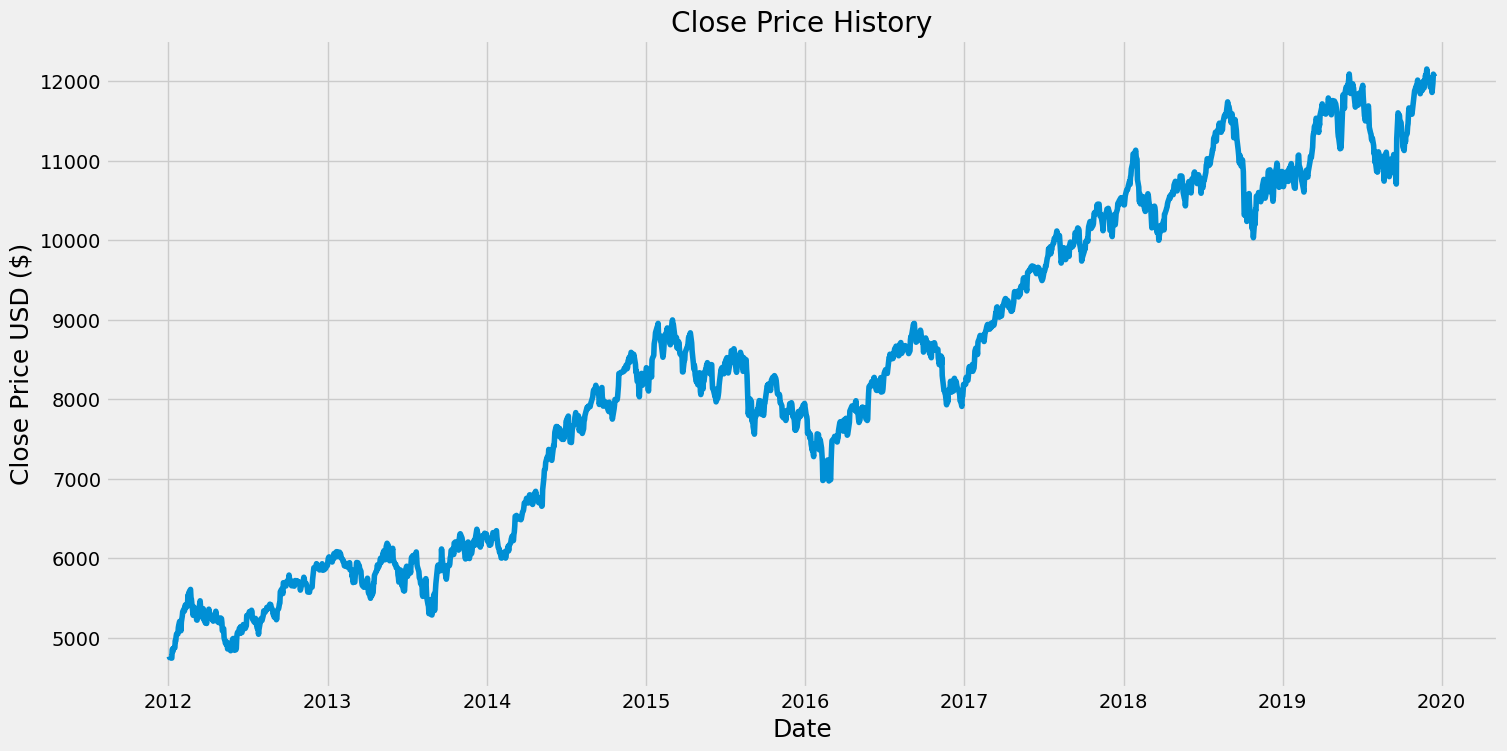

In [4]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#create a new dataframe with only the close column
data=df.filter(['Close'])
#convert the dataframe to a numpy array
dataset=data.values
#get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1553

In [6]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[3.03711329e-03],
       [9.24645449e-04],
       [9.65179839e-04],
       ...,
       [9.75790753e-01],
       [9.91300331e-01],
       [9.86879644e-01]])

In [7]:
#create the training data set
#create the scaled training date set
train_data=scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00303711, 0.00092465, 0.00096518, 0.00152535, 0.        ,
       0.01440942, 0.01594827, 0.01193926, 0.01662991, 0.01769626,
       0.03030364, 0.02875134, 0.03720128, 0.04127778, 0.04096056,
       0.05190768, 0.05608536, 0.06234861, 0.04650158, 0.06161293,
       0.06653308, 0.07114945, 0.07870177, 0.08353413, 0.07995708,
       0.08441152, 0.09037778, 0.08622706, 0.08738793, 0.09087718,
       0.10652174, 0.10517191, 0.11088838, 0.11667241, 0.10293118,
       0.09995477, 0.0926657 , 0.0726748 , 0.08540365, 0.08671301,
       0.08057802, 0.08322369, 0.07256005, 0.06473777, 0.06447459,
       0.0797411 , 0.08325065, 0.09269272, 0.09733612, 0.08607857,
       0.07762863, 0.06941491, 0.07181765, 0.08397961, 0.06555446,
       0.07226985, 0.05958819, 0.06753866, 0.06100551, 0.0588593 ])]
[0.07461174975293794]

[array([0.00303711, 0.00092465, 0.00096518, 0.00152535, 0.        ,
       0.01440942, 0.01594827, 0.01193926, 0.01662991, 0.01769626,
       0.03030364, 0.02875134, 0.03

In [8]:
#convert the x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train), np.array(y_train)

In [9]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape

(1493, 60, 1)

In [10]:
#build the LSTM model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1493/1493 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - loss: 0.0029


In [13]:
#create the testing data set
#create a new array containig scaled values from index 1542 to 2002
test_data=scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
#convert the data to a numpy array
x_test=np.array(x_test)

In [15]:
#reshape the the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step


In [17]:
#get the root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

44.97681670827964

<ipython-input-18-1087ce214592>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


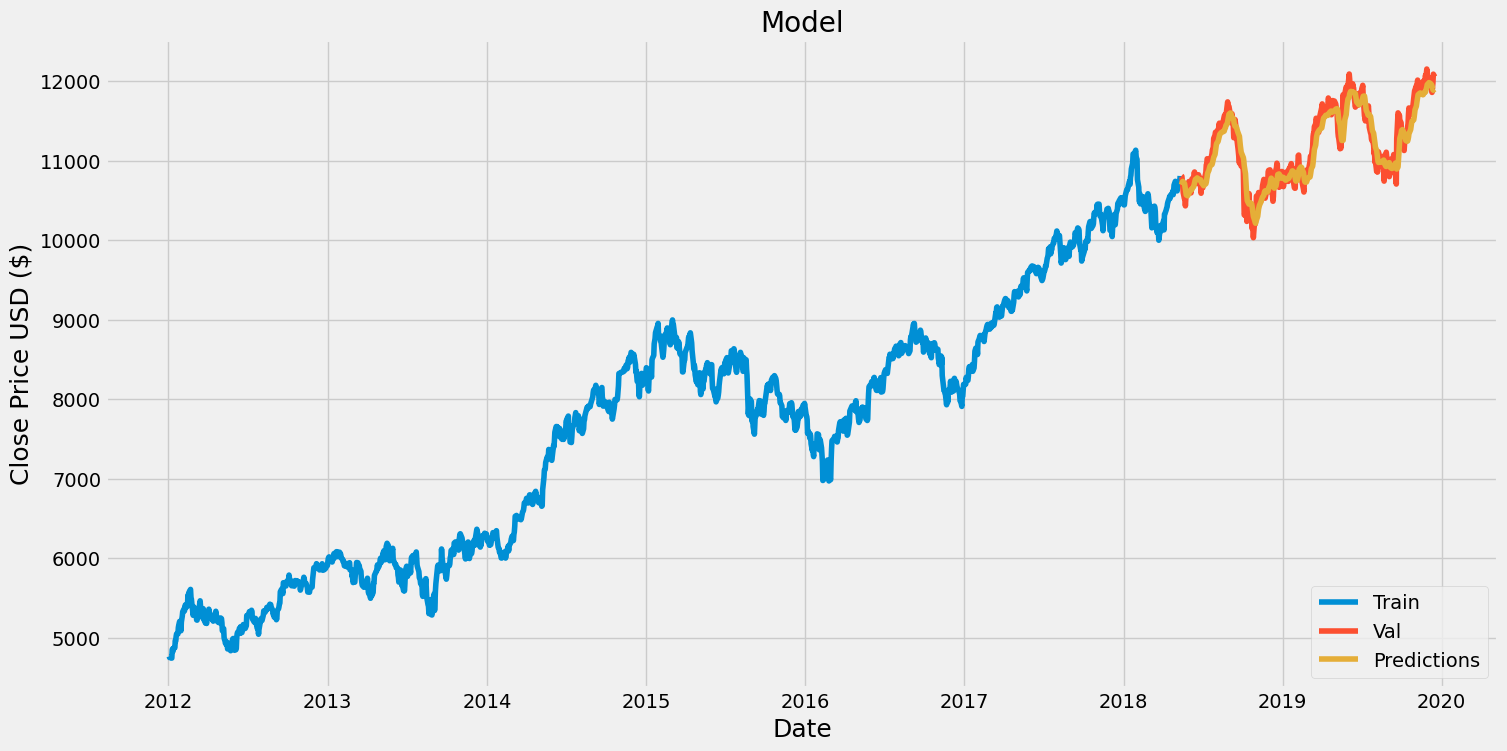

In [18]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualization of data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
#show the actual price and predicted price
valid

,Close,Predictions
Date,,
2018-05-14,10806.599609,10696.241211
2018-05-15,10801.849609,10714.630859
2018-05-16,10741.099609,10731.232422
2018-05-17,10682.700195,10737.912109
2018-05-18,10596.400391,10732.522461
...,...,...
2019-12-10,11856.799805,11936.938477
2019-12-11,11910.150391,11911.089844
2019-12-12,11971.799805,11891.778320


In [20]:
# Get the stock quote using yfinance
apple_quote = yf.download('^NSEI', start='2012-01-01', end='2019-12-17')

# Create a new DataFrame with only the 'Close' column
new_df = apple_quote.filter(['Close'])

# Define the scaler and fit it on the entire dataset (or on training data if available)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(new_df.values)  # Fit the scaler on the entire 'Close' values

# Get the last 60 days of closing price values and convert the DataFrame to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data set to a NumPy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price using your trained model
pred_price = model.predict(X_test)

# Undo the scaling to get the actual predicted price
pred_price = scaler.inverse_transform(pred_price)

# Print the predicted price
print(pred_price)

[*********************100%%**********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[11914.358]]


In [28]:
# Get the stock quote using yfinance for a single day
apple_quote2 = yf.download('^NSEI', start='2019-12-17', end='2019-12-19')

# Print the 'Close' price for 2019-12-18
print()
print(end)
print(apple_quote2.loc['2019-12-18', 'Close'])

[*********************100%%**********************]  1 of 1 completed


2019-12-17 00:00:00
12221.650390625
